

# Exploring the Neighborhoods in Singapore: Data Science in Real Life 

As a part of the final IBM Capstone Project, we get a to know of what data scientists go through in real life. Objectives of the final assignments were to define a business problem, look for data in the web and, use Foursquare location data to compare different districts within wards (municipalities) of Singapore (choice of city depends on the students) to figure out which neighborhood is suitable for starting a restaurant business(‘idea’ also depends on individual students).

Before we get the data and start exploring it, let's download all the dependencies that we will need.

### Table of Contents

#### 1. Discussion and Background of the Business Problem: 

#### 2. Data Preparation:

#### 3. Explore regions in Singapore

#### 4. Analyze Each Neighborhood

#### 5. Cluster Neighborhoods

#### 6. Examine Clusters

#### 7. Results and Discussion:

#### 8. Conclusion


In [3]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # c

!pip install beautifulsoup4

!python3 -m pip install lxml

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Discussion and Background of the Business Problem: 

### Problem Statement: Prospects of a Lunch Restaurant, Singapore.

Singapore’s economic freedom score is 89.4, making its economy the 2nd freest in the 2019 Index. Its overall score has increased by 0.6 point, with increases in scores for trade freedom and government integrity outpacing modest declines in labor freedom and property rights. Singapore is ranked 2nd among 43 countries in the Asia–Pacific region, and its overall score is well above the regional and world averages.

The aim of this project is to explore the areas of singapore and find the best place to open a breakfast cum lunch restuarant

### Target Audience

What type of clients or a group of people would be interested in this project?
    
    
1.Business personnel who wants to invest or open a restaurant. This analysis will be a comprehensive guide to start or expand restaurants targeting the large pool of office workers in singapore during lunch hours.
    
2.Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
    
3.New graduates, to find reasonable lunch/breakfast place close to office.
    
4.Budding Data Scientists, who want to implement some of the most used Exploratory Data Analysis techniques to obtain necessary data, analyze it, and, finally be able to tell a story out of it.

## 2. Data Preparation:

### 2.1. Get The Names of Wards, Major Districts and Population from Wikipedia 

In [5]:
from bs4 import BeautifulSoup

response_obj = requests.get('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore').text
print (type (response_obj))

<class 'str'>


In [6]:
soup = BeautifulSoup(response_obj,'html.parser')
print (soup.prettify())


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Planning Areas of Singapore - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Planning_Areas_of_Singapore","wgTitle":"Planning Areas of Singapore","wgCurRevisionId":904772200,"wgRevisionId":904772200,"wgArticleId":2224605,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using deprecated image syntax","Urban planning in Singapore","Subdivisions of Singapore"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","

### Processing the Information From Wiki To Make Necessary Lists


In [7]:
#pinpointing the location of the table and its contents
Wards_Singpore_Table = soup.find('table', class_ = 'wikitable sortable')
Wards_Singpore_Table

<table class="wikitable sortable">
<tbody><tr>
<th>Name <small>(<a href="/wiki/English_language" title="English language">English</a>)</small>
</th>
<th><a href="/wiki/Malay_language" title="Malay language">Malay</a>
</th>
<th><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>
</th>
<th><a href="/wiki/Pinyin" title="Pinyin">Pinyin</a>
</th>
<th><a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>
</th>
<th>Region
</th>
<th>Area (km2)
</th>
<th>Population<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[6]</a></sup>
</th>
<th>Density (/km2)
</th></tr>
<tr>
<td><a href="/wiki/Ang_Mo_Kio" title="Ang Mo Kio">Ang Mo Kio</a>
</td>
<td>
</td>
<td>宏茂桥
</td>
<td>Hóng mào qiáo
</td>
<td>ஆங் மோ கியோ
</td>
<td><a href="/wiki/North-East_Region,_Singapore" title="North-East Region, Singapore">North-East</a>
</td>
<td>13.94
</td>
<td>165,710
</td>
<td>12,000
</td></tr>
<tr>
<td><a href="/wiki/Bedok" title="Bedok">Bedok</a>
</td>
<td>*
</td>
<td>勿洛
</td>
<td>

In [8]:
Name=[]
Region = []
Area = []
Population = []
Density = []

for row in Wards_Singpore_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
   
    if len(Ward)==9: #Only extract table body not heading
        Name.append(Ward[0].find(text=True).rstrip())
        Region.append(Ward[5].find(text=True).rstrip())
        Area.append(Ward[6].find(text=True).rstrip())
        Population.append(Ward[7].find(text=True).rstrip())
        Density.append(Ward[8].find(text=True).rstrip())
            


In [9]:

Singapore_data=pd.DataFrame(Name,columns=['Name'])
Singapore_data['Region']=Region
Singapore_data['Area_SqKm']=Area
Singapore_data['Population']=Population
Singapore_data['Density_Per_SqKm']=Density
Singapore_data


,Name,Region,Area_SqKm,Population,Density_Per_SqKm
0,Ang Mo Kio,North-East,13.94,"165,710","12,000"
1,Bedok,East,21.69,"281,300","13,000"
2,Bishan,Central,7.62,"88,490","12,000"
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,"144,410","13,000"
5,Bukit Merah,Central,14.34,"151,870","11,000"
6,Bukit Panjang,West,8.99,"140,820","16,000"
7,Bukit Timah,Central,17.53,"77,280","4,400"
8,Central Water Catchment,North,37.15,*,*
9,Changi,East,40.61,"2,080",62.3


In [10]:
Singapore_data_Final=pd.DataFrame(Name,columns=['Name'])
Singapore_data_Final['Region']=Region
Singapore_data_Final['Area_SqKm']=Area
Singapore_data_Final.index = np.arange(1, len(Singapore_data_Final) + 1) # reset the index so that it starts from 1. 

Singapore_data_Final

,Name,Region,Area_SqKm
1,Ang Mo Kio,North-East,13.94
2,Bedok,East,21.69
3,Bishan,Central,7.62
4,Boon Lay,West,8.23
5,Bukit Batok,West,11.13
6,Bukit Merah,Central,14.34
7,Bukit Panjang,West,8.99
8,Bukit Timah,Central,17.53
9,Central Water Catchment,North,37.15
10,Changi,East,40.61


Get the Coordinates of the Major Districts


In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
Singapore_data_Final['Area_Name_Coord']= Singapore_data_Final['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

Singapore_data_Final

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,Name,Region,Area_SqKm,Area_Name_Coord
1,Ang Mo Kio,North-East,13.94,"(1.369842, 103.8466086)"
2,Bedok,East,21.69,"(1.3239765, 103.930216)"
3,Bishan,Central,7.62,"(1.3514521, 103.8482496)"
4,Boon Lay,West,8.23,"(1.3456401, 103.7118018)"
5,Bukit Batok,West,11.13,"(1.3490572, 103.7495906)"
6,Bukit Merah,Central,14.34,"(4.5592879, 101.0255816)"
7,Bukit Panjang,West,8.99,"(1.377921, 103.7718658)"
8,Bukit Timah,Central,17.53,"(1.3546901, 103.7763724)"
9,Central Water Catchment,North,37.15,"(-33.55936435, 118.150468671534)"
10,Changi,East,40.61,"(36.8394346, 119.4013261)"


In [12]:
Singapore_data_Final[['Latitude', 'Longitude']] = Singapore_data_Final['Area_Name_Coord'].apply(pd.Series)
Singapore_data_Final

,Name,Region,Area_SqKm,Area_Name_Coord,Latitude,Longitude
1,Ang Mo Kio,North-East,13.94,"(1.369842, 103.8466086)",1.369842,103.846609
2,Bedok,East,21.69,"(1.3239765, 103.930216)",1.323976,103.930216
3,Bishan,Central,7.62,"(1.3514521, 103.8482496)",1.351452,103.848250
4,Boon Lay,West,8.23,"(1.3456401, 103.7118018)",1.345640,103.711802
5,Bukit Batok,West,11.13,"(1.3490572, 103.7495906)",1.349057,103.749591
6,Bukit Merah,Central,14.34,"(4.5592879, 101.0255816)",4.559288,101.025582
7,Bukit Panjang,West,8.99,"(1.377921, 103.7718658)",1.377921,103.771866
8,Bukit Timah,Central,17.53,"(1.3546901, 103.7763724)",1.354690,103.776372
9,Central Water Catchment,North,37.15,"(-33.55936435, 118.150468671534)",-33.559364,118.150469
10,Changi,East,40.61,"(36.8394346, 119.4013261)",36.839435,119.401326


In [13]:
Singapore_data_Final.drop(['Area_Name_Coord'], axis=1, inplace=True)
Singapore_data_Final

,Name,Region,Area_SqKm,Latitude,Longitude
1,Ang Mo Kio,North-East,13.94,1.369842,103.846609
2,Bedok,East,21.69,1.323976,103.930216
3,Bishan,Central,7.62,1.351452,103.848250
4,Boon Lay,West,8.23,1.345640,103.711802
5,Bukit Batok,West,11.13,1.349057,103.749591
6,Bukit Merah,Central,14.34,4.559288,101.025582
7,Bukit Panjang,West,8.99,1.377921,103.771866
8,Bukit Timah,Central,17.53,1.354690,103.776372
9,Central Water Catchment,North,37.15,-33.559364,118.150469
10,Changi,East,40.61,36.839435,119.401326


## We have the Dataframe with Coordinates 

But here we see problem with coordinates for some places like Bukit Merah,Central Water Catchment,Changi,Downtown Core,Mandai,Museum,Newton,North-Eastern Islands,Orchard,Outram,Pioneer,Queenstown,River Valley,Simpang,Tengah,Western Islands,Woodlands. So we need to replace them manually

Google search gives the values

Bukit Merah---1.2819054° N,103.8217113° E

Central Water Catchment---1.3552054° N,103.7950113° E

Changi---1.3450054° N,103.9810113° E

Downtown Core---1.2867054° N,103.8513113° E

Mandai---1.4260054° N,103.8219113° E

Museum---1.2960317° N,103.8424705° E

Newton---1.3076054° N,103.8382113° E

North-Eastern Islands---1.4064054° N,104.0301113° E

Orchard---1.3048054° N,103.8296113° E

Outram---1.2849054° N,103.8417113° E

Pioneer---1.33587865648° N,103.691660567° E

Queenstown---1.2942054° N,103.7839113° E

River Valley---1.2959054° N,103.8339113° E

Simpang---1.4443054° N,103.8406113° E

Tengah---1.3555054° N,103.7286113° E

Western Islands---1.2479054° N,103.6746113° E

Woodlands---1.4382054° N,103.7868113° E


In [14]:
index_to_change=[6,9,10,14,21,25,26,27,29,30,33,35,36,42,49,52,54]
latitude_to_change=[1.2819054,1.3552054,1.3450054,1.2867054,1.4260054,1.2960317,1.3076054,1.4064054,1.3048054,1.2849054,1.3358787,1.2942054,1.2959054,1.4443054,1.3555054,1.2479054,1.4382054]
longitude_to_change=[103.8217113,103.7950113,103.9810113,103.8513113,103.8219113,103.8424705,103.8382113,104.0301113,103.8296113,103.8417113,103.691661,103.7839113,103.8339113,103.8406113,103.7286113,103.6746113,103.7868113]

for i in range(len(index_to_change)):
    print('Before',Singapore_data_Final.loc[index_to_change[i],'Latitude'],Singapore_data_Final.loc[index_to_change[i],'Longitude'])
    Singapore_data_Final.loc[index_to_change[i],'Latitude']= latitude_to_change[i]
    Singapore_data_Final.loc[index_to_change[i],'Longitude']= longitude_to_change[i]
    print('After',Singapore_data_Final.loc[index_to_change[i],'Latitude'],Singapore_data_Final.loc[index_to_change[i],'Longitude'])
    
    

Before 4.5592879 101.0255816
After 1.2819054 103.8217113
Before -33.55936435 118.150468671534
After 1.3552054 103.7950113
Before 36.8394346 119.4013261
After 1.3450054 103.9810113
Before 53.5414274 -113.5004341
After 1.2867054 103.8513113
Before -5.0017688 -45.6112044
After 1.4260054 103.8219113
Before 42.6061514 -2.2262371
After 1.2960317 103.8424705
Before 42.3370414 -71.2092214
After 1.3076054 103.8382113
Before 23.85945265 58.0986578716435
After 1.4064054 104.0301113
Before 37.3949088 -121.9343425
After 1.3048054 103.8296113
Before 44.9537444 -65.2139856
After 1.2849054 103.8417113
Before 38.4318551 -120.5718719
After 1.3358787 103.691661
Before -45.0317203 168.6608096
After 1.2942054 103.7839113
Before 48.0202386 -95.7822406
After 1.2959054 103.8339113
Before -6.6837633 107.5376996
After 1.4443054 103.8406113
Before -5.15 132.016667
After 1.3555054 103.7286113
Before 45.0473535 -80.3432823
After 1.2479054 103.6746113
Before 30.1734194 -95.504686
After 1.4382054 103.7868113


### Final Data-Frame with Coordinates of the Major Areas

In [15]:
Singapore_data_Final

,Name,Region,Area_SqKm,Latitude,Longitude
1,Ang Mo Kio,North-East,13.94,1.369842,103.846609
2,Bedok,East,21.69,1.323976,103.930216
3,Bishan,Central,7.62,1.351452,103.848250
4,Boon Lay,West,8.23,1.345640,103.711802
5,Bukit Batok,West,11.13,1.349057,103.749591
6,Bukit Merah,Central,14.34,1.281905,103.821711
7,Bukit Panjang,West,8.99,1.377921,103.771866
8,Bukit Timah,Central,17.53,1.354690,103.776372
9,Central Water Catchment,North,37.15,1.355205,103.795011
10,Changi,East,40.61,1.345005,103.981011


In [16]:
#Singapore_data_Final = Singapore_data_Final.groupby('Region').agg({'BOUROUGH':'first', 
#                             'NEIGHBOURHOOD': ', '.join}).reset_index()
#Singapore_data_Final = Singapore_data_Final.replace('\n','', regex=True)
#Singapore_data_Final

#### Use geopy library to get the latitude and longitude values of Singapore.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [17]:
address = 'Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore City are 1.3408528, 103.878446863736.


#### Create a map of Singapore with neighborhoods superimposed on top.

In [18]:
# create map of Toronto using latitude and longitude values
map_singapore= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng , Name , Region in zip(Singapore_data_Final['Latitude'], Singapore_data_Final['Longitude'], Singapore_data_Final['Name'], Singapore_data_Final['Region']):
    label = '{}, {}'.format(Region, Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

#### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'BULHMQR1TRTERQPCD0MNSVPI2FPNV3DZ1YCMRYUT4VVZ0VPP' # your Foursquare ID
CLIENT_SECRET = '1X2NBGI2M4ZFTYADR4XXTG0HG2KX0UXU43XTTLIJQ0PNVKMO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BULHMQR1TRTERQPCD0MNSVPI2FPNV3DZ1YCMRYUT4VVZ0VPP
CLIENT_SECRET:1X2NBGI2M4ZFTYADR4XXTG0HG2KX0UXU43XTTLIJQ0PNVKMO


## 3. Explore regions in Singapore

#### Let's create a function to get the venues to all the regions in Singapore

Exploring the regions
1. Create the get request url (Foursquare ID and Secret are necessary) 
    1.a. Number of Venues we will look for is 100 2.a. Radius of Search Would be 1 k.m. 
2. Create a json from the request object (Need requests Module) 
3. Create the lists Containing all the information 
4. From the lists create the dataframe.

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT = 100 # limit of number of venues returned by Foursquare API

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

### Use the Function Above to Create the Dataframe of Venues Around areas of Singapore


In [21]:
singapore_Venues = getNearbyVenues(names=Singapore_data_Final['Name'],
                                   latitudes=Singapore_data_Final['Latitude'],
                                   longitudes=Singapore_data_Final['Longitude']
                                  )



Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


#### Let's check the size of the resulting dataframe

In [22]:
print(singapore_Venues.shape)
singapore_Venues.head()

(3239, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Ang Mo Kio,1.369842,103.846609,Old Chang Kee,1.369094,103.848389,Snack Place
1,Ang Mo Kio,1.369842,103.846609,Bun Master,1.369242,103.849031,Bakery
2,Ang Mo Kio,1.369842,103.846609,Subway,1.369136,103.847612,Sandwich Place
3,Ang Mo Kio,1.369842,103.846609,MOS Burger,1.369170,103.847831,Burger Joint
4,Ang Mo Kio,1.369842,103.846609,PLAYe,1.369109,103.848225,Hobby Shop


In [23]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Singapore_Venues_only_restaurant = singapore_Venues[singapore_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Singapore_Venues_only_restaurant.index = np.arange(1, len(Singapore_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Singapore_Venues_only_restaurant.shape)
Singapore_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (980, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
1,Ang Mo Kio,1.369842,103.846609,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant
2,Ang Mo Kio,1.369842,103.846609,Collin's Grille . Bento,1.371713,103.847526,Modern European Restaurant
3,Ang Mo Kio,1.369842,103.846609,Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐,1.371975,103.846408,Chinese Restaurant


In [24]:
## Show in Map the Top Rated Restaruants 

map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Area_Name = Singapore_data_Final["Name"]

x = np.arange(len(Area_Name))

#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']



# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Singapore_Venues_only_restaurant['Venue_Latitude'], 
                                  Singapore_Venues_only_restaurant['Venue_Longitude'], 
                                  Singapore_Venues_only_restaurant['Venue_Category'], 
                                  Singapore_Venues_only_restaurant['Neighborhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
 #       color=rainbow[Area_Name.index(distr)-1],
        fill=True,
  #      fill_color=rainbow[Area_Name.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

Let's check how many venues were returned for each neighborhood

In [25]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Singapore_Venues_only_restaurant['Venue_Category'].unique())))


There are 59 unique categories.


We have seen that there are 59 unique categories in the Venues Data-Frame. 
Let's see the Frequency of Each Category


In [26]:
print (Singapore_Venues_only_restaurant['Venue_Category'].value_counts())

Chinese Restaurant                 161
Japanese Restaurant                110
Asian Restaurant                   101
Fast Food Restaurant                82
Indian Restaurant                   59
Seafood Restaurant                  50
Thai Restaurant                     39
Italian Restaurant                  37
Restaurant                          34
Sushi Restaurant                    32
Vegetarian / Vegan Restaurant       27
French Restaurant                   21
Korean Restaurant                   18
Dumpling Restaurant                 17
American Restaurant                 15
Hotpot Restaurant                   13
Ramen Restaurant                    12
Malay Restaurant                    12
Indonesian Restaurant               11
Dim Sum Restaurant                  11
Mexican Restaurant                  10
Spanish Restaurant                   9
Vietnamese Restaurant                8
Halal Restaurant                     8
Modern European Restaurant           7
Hainan Restaurant        

### Create a Data-frame with the 10 Most Frequently Occuring Venue_Category


In [27]:
# create a dataframe of top 10 categories
singapore_Venues_Top10 = Singapore_Venues_only_restaurant['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
singapore_Venues_Top10=singapore_Venues_Top10.reset_index()
#Singapore_Venues_Top10

singapore_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
singapore_Venues_Top10

,Venue_Category,Frequency
0,Chinese Restaurant,161
1,Japanese Restaurant,110
2,Asian Restaurant,101
3,Fast Food Restaurant,82
4,Indian Restaurant,59
5,Seafood Restaurant,50
6,Thai Restaurant,39
7,Italian Restaurant,37
8,Restaurant,34
9,Sushi Restaurant,32


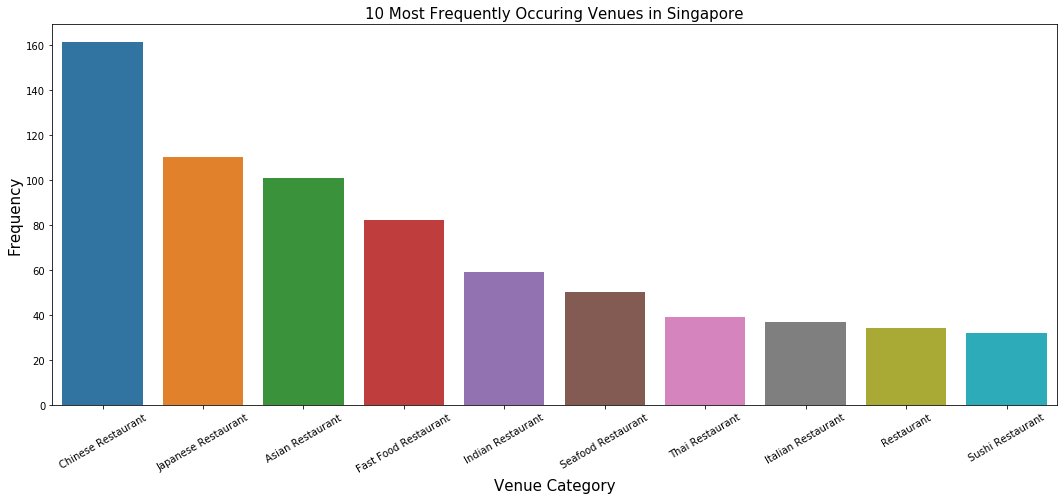

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=singapore_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Singapore', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()


## Chinese Restaurant is mostly frequent venues in Singapore 

In [29]:
Singapore_Venues_only_restaurant.groupby('Neighborhood').count()

,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhood,,,,,,
Ang Mo Kio,21,21,21,21,21,21
Bedok,34,34,34,34,34,34
Bishan,16,16,16,16,16,16
Boon Lay,27,27,27,27,27,27
Bukit Batok,11,11,11,11,11,11
Bukit Merah,24,24,24,24,24,24
Bukit Panjang,11,11,11,11,11,11
Bukit Timah,1,1,1,1,1,1
Changi,5,5,5,5,5,5


## 4. Analyze Each Neighborhood

In [30]:
# one hot encoding
singapore_onehot = pd.get_dummies(Singapore_Venues_only_restaurant[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = Singapore_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,North Indian Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
1,Ang Mo Kio,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [31]:
singapore_onehot.shape

(980, 60)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [32]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,North Indian Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,Ang Mo Kio,0.000000,0.047619,0.000000,0.000000,0.000000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
1,Bedok,0.029412,0.088235,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.029412,0.000000,0.000000,0.088235,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412,0.058824,0.029412,0.029412,0.000000,0.088235,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000
2,Bishan,0.000000,0.125000,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.000000,0.000000
3,Boon Lay,0.000000,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.148148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.111111,0.000000,0.000000,0.037037,0.222222,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bukit Batok,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bukit Merah,0.041667,0.041667,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.0000

#### Let's confirm the new size

In [33]:
singapore_grouped.shape

(47, 60)

#### Let's print each neighborhood along with the top 5 most common venues

In [34]:
num_top_venues = 5

for hood in singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                  venue  freq
0  Fast Food Restaurant  0.19
1    Chinese Restaurant  0.19
2   Japanese Restaurant  0.14
3      Malay Restaurant  0.05
4      Asian Restaurant  0.05


----Bedok----
                           venue  freq
0             Chinese Restaurant  0.18
1               Asian Restaurant  0.09
2            Japanese Restaurant  0.09
3           Fast Food Restaurant  0.09
4  Vegetarian / Vegan Restaurant  0.06


----Bishan----
                venue  freq
0  Chinese Restaurant  0.19
1     Thai Restaurant  0.19
2  Italian Restaurant  0.12
3  Seafood Restaurant  0.12
4    Asian Restaurant  0.12


----Boon Lay----
                  venue  freq
0   Japanese Restaurant  0.22
1      Asian Restaurant  0.22
2  Fast Food Restaurant  0.15
3     Indian Restaurant  0.11
4    Chinese Restaurant  0.11


----Bukit Batok----
                    venue  freq
0      Chinese Restaurant  0.36
1    Fast Food Restaurant  0.36
2        Malay Restaurant  0.18
3        Halal Re

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Shanghai Restaurant,Indian Restaurant,Modern European Restaurant,Halal Restaurant,Ramen Restaurant,Seafood Restaurant,Malay Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Sushi Restaurant,Indian Restaurant,Malay Restaurant
2,Bishan,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Japanese Restaurant,Italian Restaurant,Hakka Restaurant,Dumpling Restaurant,Hong Kong Restaurant,Hainan Restaurant
3,Boon Lay,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Malay Restaurant,Japanese Curry Restaurant,Hong Kong Restaurant,Halal Restaurant,Seafood Restaurant
4,Bukit Batok,Chinese Restaurant,Fast Food Restaurant,Malay Restaurant,Halal Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


In [37]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Shanghai Restaurant,Indian Restaurant,Modern European Restaurant,Halal Restaurant,Ramen Restaurant,Seafood Restaurant,Malay Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Sushi Restaurant,Indian Restaurant,Malay Restaurant
2,Bishan,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Japanese Restaurant,Italian Restaurant,Hakka Restaurant,Dumpling Restaurant,Hong Kong Restaurant,Hainan Restaurant
3,Boon Lay,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Malay Restaurant,Japanese Curry Restaurant,Hong Kong Restaurant,Halal Restaurant,Seafood Restaurant
4,Bukit Batok,Chinese Restaurant,Fast Food Restaurant,Malay Restaurant,Halal Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
5,Bukit Merah,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant,American Restaurant,Hong Kong Restaurant,Hainan Restaurant,Korean Restaurant,Seafood Restaurant
6,Bukit Panjang,Asian Restaurant,Fast Food Restaurant,American Restaurant,Sushi Restaurant,Restaurant,Seafood Restaurant,Chinese Restaurant,Greek Restaurant,Japanese Restaurant,Japanese Curry Restaurant
7,Bukit Timah,Australian Restaurant,Yunnan Restaurant,German Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant
8,Changi,Fast Food Restaurant,Seafood Restaurant,Chinese Restaurant,Vietnamese Restaurant,Belgian Restaurant,Cantonese Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
9,Choa Chu Kang,Fast Food Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Portuguese Restaurant,Thai Restaurant,Japanese Restaurant,Asian Restaurant,Japanese Curry Restaurant,Indonesian Restaurant


## 5. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [38]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

singapore_grouped_clustering = singapore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 1, 0, 0, 1, 3, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

singapore_merged = Singapore_data_Final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
singapore_merged = singapore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

singapore_merged.head() # check the last columns!

,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ang Mo Kio,North-East,13.94,1.369842,103.846609,1.0,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Shanghai Restaurant,Indian Restaurant,Modern European Restaurant,Halal Restaurant,Ramen Restaurant,Seafood Restaurant,Malay Restaurant
2,Bedok,East,21.69,1.323976,103.930216,1.0,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Sushi Restaurant,Indian Restaurant,Malay Restaurant
3,Bishan,Central,7.62,1.351452,103.848250,0.0,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Japanese Restaurant,Italian Restaurant,Hakka Restaurant,Dumpling Restaurant,Hong Kong Restaurant,Hainan Restaurant
4,Boon Lay,West,8.23,1.345640,103.711802,1.0,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Malay Restaurant,Japanese Curry Restaurant,Hong Kong Restaurant,Halal Restaurant,Seafood Restaurant
5,Bukit Batok,West,11.13,1.349057,103.749591,0.0,Chinese Restaurant,Fast Food Restaurant,Malay Restaurant,Halal Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


In [40]:
singapore_merged['ClusterLabels'].fillna(0, inplace=True)
singapore_merged['ClusterLabels'] = singapore_merged['ClusterLabels'].apply(np.int64)
singapore_merged['ClusterLabels']

1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     3
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    1
18    1
19    0
20    4
21    0
22    1
23    1
24    0
25    1
26    1
27    0
28    0
29    1
30    1
31    1
32    0
33    1
34    1
35    1
36    1
37    0
38    0
39    0
40    1
41    0
42    0
43    1
44    1
45    1
46    2
47    1
48    1
49    0
50    0
51    0
52    0
53    0
54    1
55    0
Name: ClusterLabels, dtype: int64

Finally, let's visualize the resulting clusters

In [41]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], singapore_merged['Longitude'], singapore_merged['Name'], singapore_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Examine Clusters


#### Cluster 1

In [42]:
singapore_cluster1=singapore_merged.loc[singapore_merged['ClusterLabels'] == 1, singapore_merged.columns[[0] + list(range(1, singapore_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(singapore_cluster1.shape[0]))
singapore_cluster1

No of Neighbourhood in Cluster Label 1: 27


,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ang Mo Kio,North-East,13.94,1.369842,103.846609,1,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,Shanghai Restaurant,Indian Restaurant,Modern European Restaurant,Halal Restaurant,Ramen Restaurant,Seafood Restaurant,Malay Restaurant
2,Bedok,East,21.69,1.323976,103.930216,1,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Sushi Restaurant,Indian Restaurant,Malay Restaurant
4,Boon Lay,West,8.23,1.345640,103.711802,1,Asian Restaurant,Japanese Restaurant,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Malay Restaurant,Japanese Curry Restaurant,Hong Kong Restaurant,Halal Restaurant,Seafood Restaurant
7,Bukit Panjang,West,8.99,1.377921,103.771866,1,Asian Restaurant,Fast Food Restaurant,American Restaurant,Sushi Restaurant,Restaurant,Seafood Restaurant,Chinese Restaurant,Greek Restaurant,Japanese Restaurant,Japanese Curry Restaurant
10,Changi,East,40.61,1.345005,103.981011,1,Fast Food Restaurant,Seafood Restaurant,Chinese Restaurant,Vietnamese Restaurant,Belgian Restaurant,Cantonese Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
12,Choa Chu Kang,West,6.11,1.389260,103.743728,1,Fast Food Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Portuguese Restaurant,Thai Restaurant,Japanese Restaurant,Asian Restaurant,Japanese Curry Restaurant,Indonesian Restaurant
14,Downtown Core,Central,4.34,1.286705,103.851311,1,Japanese Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant,Restaurant,Asian Restaurant,Seafood Restaurant,Dumpling Restaurant,Modern European Restaurant,Middle Eastern Restaurant
17,Jurong East,West,17.83,1.333115,103.742297,1,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Sushi Restaurant,Fast Food Restaurant,Hotpot Restaurant,Halal Restaurant,German Restaurant
18,Jurong West,West,14.69,1.339636,103.707339,1,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Malay Restaurant,Seafood Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,American Restaurant
22,Marina East,Central,1.82,1.288624,103.869827,1,Seafood Restaurant,Satay Restaurant,Fast Food Restaurant,French Restaurant,American Restaurant,Cantonese Restaurant,Greek Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant


#### Cluster 2

In [43]:
singapore_cluster2=singapore_merged.loc[singapore_merged['ClusterLabels'] == 2, singapore_merged.columns[[0] + list(range(1, singapore_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(singapore_cluster2.shape[0]))
singapore_cluster2

No of Neighbourhood in Cluster Label 2: 1


,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Sungei Kadut,North,15.99,1.414997,103.753311,2,Restaurant,Yunnan Restaurant,Latin American Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant


#### Cluster 3

In [44]:
singapore_cluster3=singapore_merged.loc[singapore_merged['ClusterLabels'] == 3, singapore_merged.columns[[0] + list(range(1, singapore_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 3: %d" %(singapore_cluster3.shape[0]))
singapore_cluster3

No of Neighbourhood in Cluster Label 3: 1


,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Bukit Timah,Central,17.53,1.35469,103.776372,3,Australian Restaurant,Yunnan Restaurant,German Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant


#### Cluster 4

In [45]:
singapore_cluster4=singapore_merged.loc[singapore_merged['ClusterLabels'] == 4, singapore_merged.columns[[0] + list(range(1, singapore_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 4: %d" %(singapore_cluster4.shape[0]))
singapore_cluster4

No of Neighbourhood in Cluster Label 4: 1


,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Lim Chu Kang,North,17.3,1.434217,103.714987,4,Vegetarian / Vegan Restaurant,Yunnan Restaurant,German Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant


## 7. Results and Discussion:
We reached at the end of the analysis, where we got a sneak peak of the different areas of Singapore  and, as the business problem started with benefits and drawbacks of opening a lunch restaurant in one of the busiest areas, the data exploration was mostly concentrated on the restaurants. I have used data from web resources like Wikipedia, python libraries like Geopy, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —

1. Chinese restaurants top the charts of most common venues in Singapore.
2. Geylang (Central region) and Novena (Central region) are dominated by restaurants as the the most common venue.

According to this analysis, central region is highly populated with both commercial and residential area. Furthermore, this results also could potentially vary if we use some other clustering techniques like DBSCAN

## 8. Conclusion

Finally to conclude this project, We have got a small glimpse of how real life data-science projects look like. I’ve made use of some frequently used python libraries to scrap web-data, use Foursquare API to explore the areas of Singapore and saw the results of segmentation of districts using Folium leaflet map. Potential for this kind of analysis in a real life business problem is discussed in great detail. Also, some of the drawbacks and chance for improvements to represent even more realistic pictures are mentioned. Finally, since my analysis were mostly concentrated on the possibilities of opening a restaurants targeting the huge pool of office workers. Hopefully, this kind of analysis will provide you initial guidance to take more real-life challenges using data-science.